In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from scipy import stats
import joblib
import os
import zipfile

In [103]:
#Load & Explore Data
#https://www.kaggle.com/datasets/prevek18/ames-housing-dataset
def load_data(path):
    return pd.read_csv(path)

housing = load_data('AmesHousing.csv')
housing_to_work = housing.copy()
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [104]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [105]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [106]:
#check the most rare data
missing_ratio = housing.isnull().mean().sort_values(ascending=False)
print(missing_ratio.head(20)) 

Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Mas Vnr Type      0.605802
Fireplace Qu      0.485324
Lot Frontage      0.167235
Garage Cond       0.054266
Garage Finish     0.054266
Garage Yr Blt     0.054266
Garage Qual       0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
Bsmt Qual         0.027304
Bsmt Cond         0.027304
BsmtFin Type 1    0.027304
Mas Vnr Area      0.007850
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
dtype: float64


In [107]:
housing.shape

(2930, 82)

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

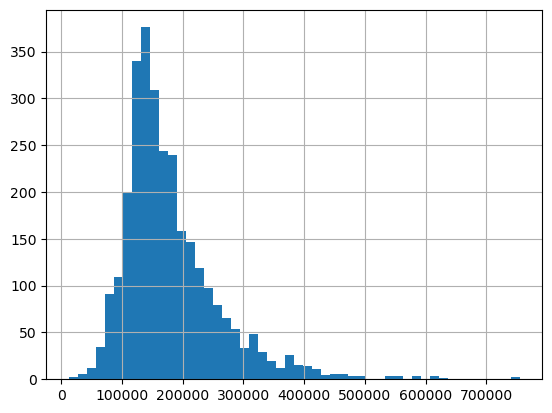

In [108]:
#see features and distrubution of target attributes
target_col = 'SalePrice'
housing[target_col].hist(bins=50)
housing[target_col].describe()

In [109]:
# Missing value patterns
missing_percent = housing.isnull().sum() / len(housing) * 100
missing_df = pd.DataFrame({'Missing_Count': housing.isnull().sum(), 'Missing_Percent': missing_percent})
missing_df.sort_values(by='Missing_Count', ascending=False)

,Missing_Count,Missing_Percent
Pool QC,2917,99.556314
Misc Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Mas Vnr Type,1775,60.580205
...,...,...
PID,0,0.000000
Central Air,0,0.000000
1st Flr SF,0,0.000000
2nd Flr SF,0,0.000000


In [110]:
#delete data with most null rows
housing = housing.drop(["Pool QC", "Misc Feature", "Alley", "Fence" ], axis=1)

In [111]:
housing.shape

(2930, 78)

In [112]:
# Unique value counts to check if any attribute has only one valy
count = 0
for col in housing.select_dtypes(include="object").columns:
    print(f"{col}: {housing[col].nunique()} unique values")
    if housing[col].nunique()==1:
        count += 1
    print(f"{housing[col].value_counts().head()}")
    print(50 * "-" )
            
print(f"number of columns with only one value : {count}")

MS Zoning: 7 unique values
MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
Name: count, dtype: int64
--------------------------------------------------
Street: 2 unique values
Street
Pave    2918
Grvl      12
Name: count, dtype: int64
--------------------------------------------------
Lot Shape: 4 unique values
Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64
--------------------------------------------------
Land Contour: 4 unique values
Land Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
--------------------------------------------------
Utilities: 3 unique values
Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
--------------------------------------------------
Lot Config: 5 unique values
Lot Config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64
--------------------------------------

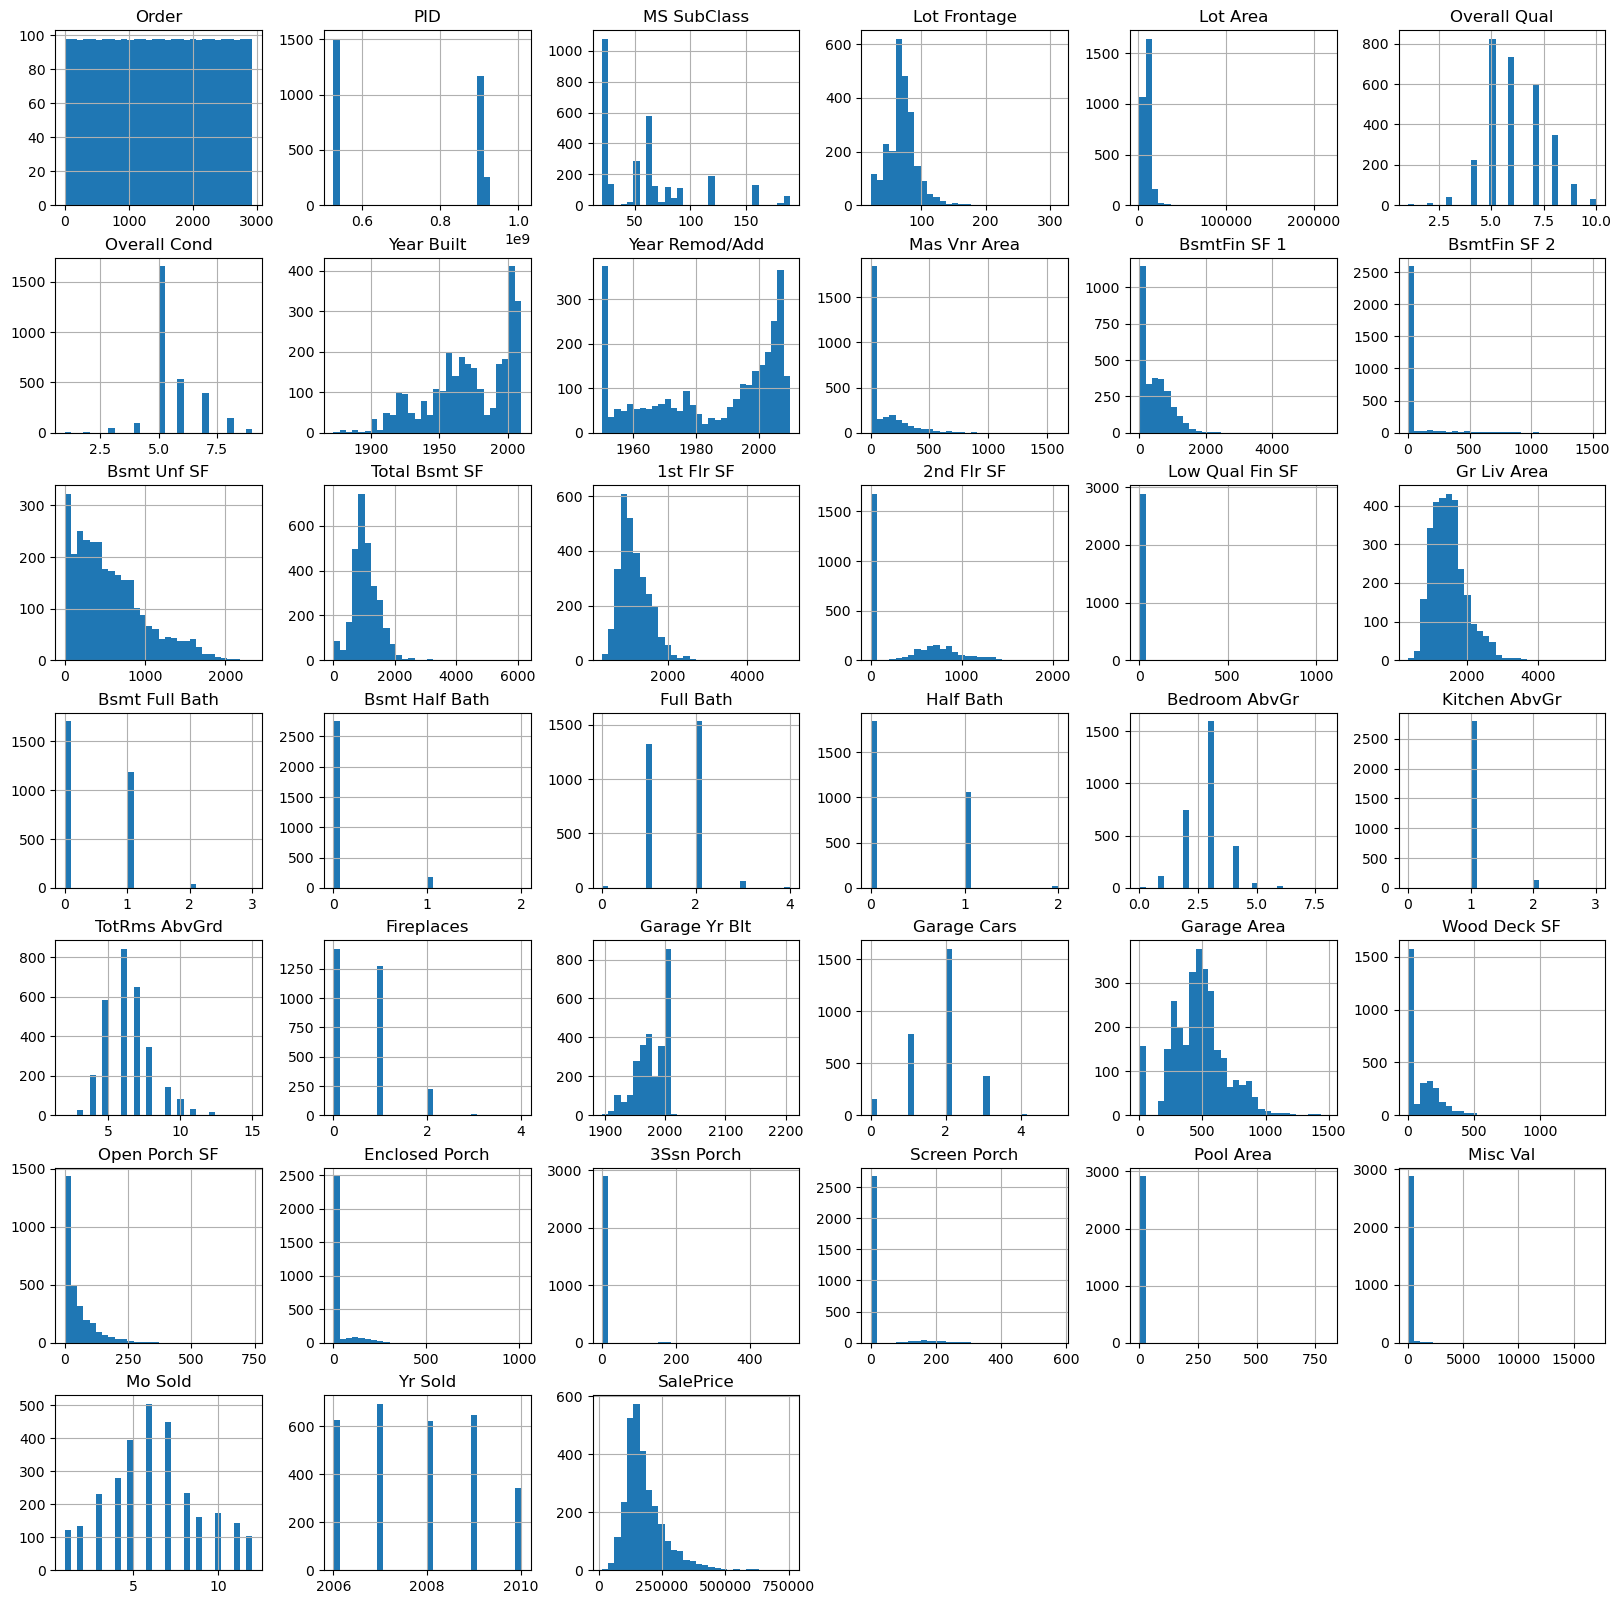

In [113]:
#histograms for all numerical values
housing.select_dtypes(include="number").hist(figsize=(20, 20), bins=30)
plt.show()

In [114]:
#see correlation on reference to target
corr_matrix = housing.select_dtypes(include="number").corr()
print(corr_matrix[target_col].sort_values(ascending=False))

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

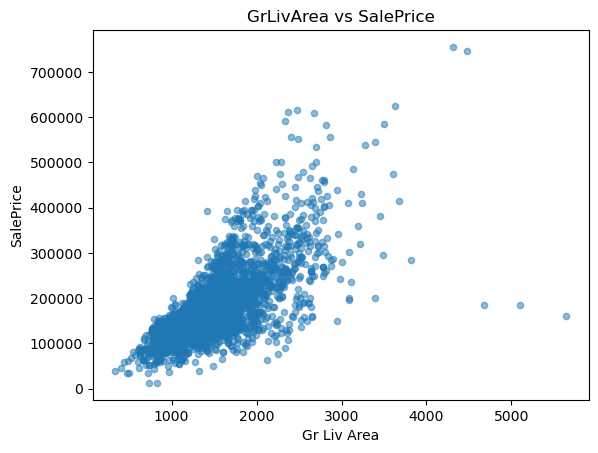

      Gr Liv Area  SalePrice
1498         5642     160000
2180         5095     183850
2181         4676     184750


In [115]:
# Scatter plot to visually detect outliers
housing.plot(kind="scatter", x="Gr Liv Area", y=target_col, alpha=0.5)
plt.title("GrLivArea vs SalePrice")
plt.show()

# Optionally, detect points where GrLivArea is large but SalePrice is low
outliers = housing[(housing["Gr Liv Area"] > 4000) & (housing["SalePrice"] < 300000)]
print(outliers[["Gr Liv Area", "SalePrice"]])

<Axes: >

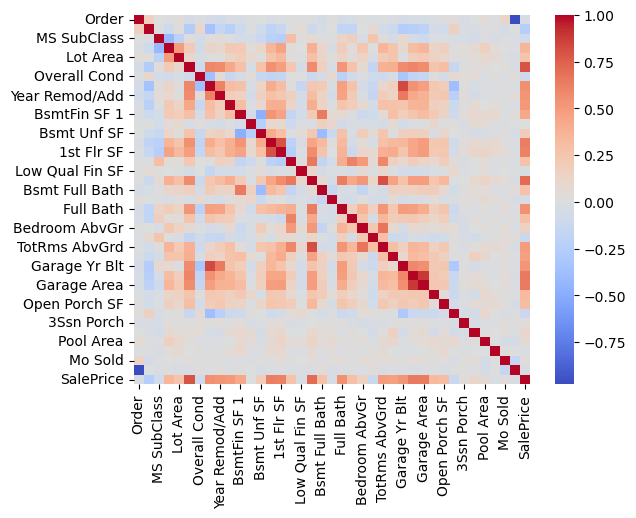

In [116]:
sns.heatmap(corr_matrix,cmap='coolwarm')

In [117]:
#delete attributes whivh are informative and can't effect the model
housing = housing.drop(["Order", "PID"], axis=1)

In [118]:
housing.shape

(2930, 76)

In [119]:
#check fo duplicate rows
print(f"Duplicate rows: {housing.duplicated().sum()}")

Duplicate rows: 0


In [120]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

In [121]:
#create collumn helpful to split dataset base on "overall qual" which is the most correlated attributes to the target
housing_to_work["income_cat"] = pd.cut(housing_to_work["Overall Qual"],
                                       bins = [0, 4, 6, 8, np.inf],
                                       labels = [1, 2, 3, 4])

count     2930
unique       4
top          2
freq      1557
Name: income_cat, dtype: int64

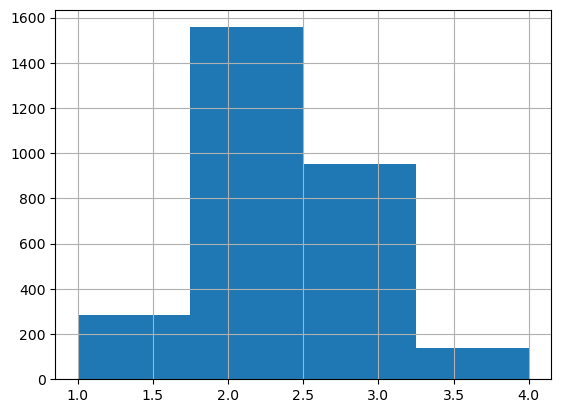

In [122]:
#check if split is good
housing_to_work["income_cat"].hist(bins=4)
housing_to_work["income_cat"].describe()

In [123]:
#split dataset to strata and creat train and test_set
def split_data(data, test_size=0.2, stratify_col=None, random_state=42):
    if stratify_col:
        strat_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
        for train_idx, test_idx in strat_split.split(data, data[stratify_col]):
            return data.iloc[train_idx], data.iloc[test_idx]
    else:
        return train_test_split(data, test_size=test_size, random_state=random_state)

train_set, test_set = split_data(housing_to_work, stratify_col="income_cat")

In [124]:
train_set = train_set.drop("income_cat", axis=1)
test_set = test_set.drop("income_cat", axis=1)

In [125]:
#separate target attribute then others
x_train = train_set.drop(target_col, axis=1)
y_train = train_set[target_col]

x_test = test_set.drop(target_col, axis=1)
y_test = test_set[target_col]

In [126]:
housing = x_train
housing_labeled = y_train
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2344 entries, 2885 to 966
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2344 non-null   int64  
 1   PID              2344 non-null   int64  
 2   MS SubClass      2344 non-null   int64  
 3   MS Zoning        2344 non-null   object 
 4   Lot Frontage     1955 non-null   float64
 5   Lot Area         2344 non-null   int64  
 6   Street           2344 non-null   object 
 7   Alley            165 non-null    object 
 8   Lot Shape        2344 non-null   object 
 9   Land Contour     2344 non-null   object 
 10  Utilities        2344 non-null   object 
 11  Lot Config       2344 non-null   object 
 12  Land Slope       2344 non-null   object 
 13  Neighborhood     2344 non-null   object 
 14  Condition 1      2344 non-null   object 
 15  Condition 2      2344 non-null   object 
 16  Bldg Type        2344 non-null   object 
 17  House Style      

In [127]:
housing.shape

(2344, 81)

In [128]:
housing.columns.get_loc("PID")

1

In [129]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = ['Full Bath', 'Half Bath', 'Bsmt Full Bath', 
                        'Bsmt Half Bath', 'Yr Sold', 'Year Built', 
                        'Year Remod/Add', 'Garage Cars', 'Total Bsmt SF']
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X["Total_Bathrooms"] = (
            X["Full Bath"] + X["Half Bath"] + 
            X["Bsmt Full Bath"] + X["Bsmt Half Bath"]
        )
        X["Age"] = X["Yr Sold"] - X["Year Built"]
        X["Remodeled"] = (X["Year Built"] != X["Year Remod/Add"]).astype(int)
        X["Has_Garage"] = (X["Garage Cars"] > 0).astype(int)
        X["Has_Basement"] = (X["Total Bsmt SF"] > 0).astype(int)
        return X


In [142]:
#creat column transform that do :handle missing values with median, scale numerival values, encode categoral columns and remove some columns
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

log_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one'))
])

num_attribs = housing.select_dtypes(exclude="object").columns.tolist()
cat_attribs = housing.select_dtypes(include="object").columns.tolist()

drop_cols = ['Utilities', 'Pool Area', 'Misc Val', '3Ssn Porch', "PID", "Order", "Pool QC", "Misc Feature", "Alley", "Fence"]
logs_trans = [
    "Lot Frontage", "Lot Area", "Mas Vnr Area", "BsmtFin SF 1",
    "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "1st Flr SF",
    "2nd Flr SF", "Gr Liv Area", "Garage Area", "Wood Deck SF",
    "Open Porch SF", "Enclosed Porch", "Screen Porch",
]

num_attribs = [
    col for col in housing.select_dtypes(exclude="object").columns
    if col not in drop_cols and col not in logs_trans
]
preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', drop_cols),
        ('log_transform', log_pipeline, logs_trans),
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs),
    ],
    remainder='passthrough'
)
X_train_prepared  = preprocessor.fit_transform(housing)

In [143]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [144]:
housing_predictions = lin_reg.predict(X_train_prepared)
linear_mse = mean_squared_error(y_train, housing_predictions)
linear_rmse = np.sqrt(linear_mse)
print("RMSE:", linear_rmse)

RMSE: 23253.511474240047


In [145]:
#test cross validation
scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

print(f"cross validation rmse score: {linear_rmse_scores}")
print("Mean RMSE:", linear_rmse_scores.mean())
print("Standard deviation:", linear_rmse_scores.std())

cross validation rmse score: [28631.78434016 30856.44281964 35679.36753892 23100.15560666
 29100.91894291 26442.71106323 20554.68798952 27708.30066409
 38518.33898216 39434.78548876]
Mean RMSE: 30002.749343606418
Standard deviation: 5932.741638423109


In [134]:
ridge_reg = Ridge()
ridge_reg.fit(X_train_prepared, y_train)

Ridge()

In [135]:
housing_predictions = ridge_reg.predict(X_train_prepared)
ridge_mse = mean_squared_error(y_train, housing_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print("RMSE:", ridge_rmse)

RMSE: 23897.683397795045


In [136]:
# Test cross validation
scores = cross_val_score(ridge_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)

print(f"Cross validation RMSE score: {ridge_rmse_scores}")
print("Mean RMSE:", ridge_rmse_scores.mean())
print("Standard deviation:", ridge_rmse_scores.std())

Cross validation RMSE score: [27431.60009981 30957.97923213 33952.81850042 21365.01649286
 27235.11308059 25066.10441187 20886.56947789 27442.90480168
 38463.67642652 36633.59744313]
Mean RMSE: 28943.53799668914
Standard deviation: 5689.997431058558


In [137]:
lasso_reg = Lasso()
lasso_reg.fit(X_train_prepared, y_train)

C:\Users\Dell\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3706466866.409424, tolerance: 1521486845.5583906
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso()

In [138]:
housing_predictions = lasso_reg.predict(X_train_prepared)
lasso_mse = mean_squared_error(y_train, housing_predictions)
lasso_rmse = np.sqrt(linear_mse)
print("RMSE:", lasso_rmse)

RMSE: 23253.511474240047


In [139]:
#test cross validation
scores = cross_val_score(lasso_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)

print(f"cross validation rmse score: {lasso_rmse_scores}")
print("Mean RMSE:", lasso_rmse_scores.mean())
print("Standard deviation:", lasso_rmse_scores.std())

C:\Users\Dell\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26593331642.893433, tolerance: 1385683319.2848802
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Dell\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111024331436.56848, tolerance: 1399366328.458126
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Dell\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3686996738.4978027, tolerance: 1346521654.3068967
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Dell\anaconda3\envs\myenv\lib\site-packages\

cross validation rmse score: [28421.12495847 30728.57657297 35521.2648376  21674.03097256
 28964.76155556 25857.91341258 20307.65385429 27513.41296358
 38273.91209627 38113.50407222]
Mean RMSE: 29537.6155296097
Standard deviation: 5944.170761568538


In [146]:
#creat column transform that do :handle missing values with median, scale numerival values, encode categoral columns and remove some columns
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


num_attribs = housing.select_dtypes(exclude="object").columns.tolist()
cat_attribs = housing.select_dtypes(include="object").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs),
    ],
    remainder='passthrough'
)
X_train_prepared  = preprocessor.fit_transform(housing)

In [147]:
#train the model using random forest regression
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_prepared, housing_labeled)

RandomForestRegressor()

In [148]:
#test the model rmse
housing_predictions = forest_reg.predict(X_train_prepared)
forest_mse = mean_squared_error(y_train, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

RMSE: 9994.201967968715


In [149]:
#test cross validation
scores = cross_val_score(forest_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

print(f"cross validation rmse score: {forest_rmse_scores}")
print("Mean RMSE:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

cross validation rmse score: [22921.09777741 32088.50544508 33492.81276149 21102.93049444
 24741.66091078 26789.45260637 21298.50320057 23589.76322795
 27845.40672415 26941.14125437]
Mean RMSE: 26081.127440260007
Standard deviation: 4012.7109617833903


In [150]:
#Hyperparameter tuning using `RandomizedSearchCV`
param_rnd = {
    'n_estimators': [50, 100, 200],       
    'max_depth': [10, 20, None],           
    'max_features': ['sqrt', 'log2', 0.3], 
    'min_samples_split': [2, 5]            
}
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_rnd,
                                n_iter=20, cv=5,
                                scoring='neg_mean_squared_error',
                                n_jobs=-1, random_state=42)
rnd_search.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2', 0.3],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [151]:
#check cross validation of best model
best_model = rnd_search.best_estimator_
scores = cross_val_score(best_model, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

print(f"cross validation rmse score: {forest_rmse_scores}")
print("Mean RMSE:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

cross validation rmse score: [22117.73007769 31305.54137148 31363.21806256 19987.87531849
 22376.9540045  24754.96819548 21789.73936734 22434.68609325
 31878.2598233  25469.90332466]
Mean RMSE: 25347.887563875083
Standard deviation: 4287.508591677638


In [153]:
#applicate best model on data set
x_test_prepared = preprocessor.transform(x_test)
final_predictions = best_model.predict(x_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Test RMSE:", final_rmse)

Test RMSE: 21618.355109195865


In [154]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([18008.63904098, 24706.18293356])

In [161]:
#this is not by me
n_bootstraps = 1000
rmse_scores = []

# Corrected bootstrap loop
rmse_scores = []
for _ in range(n_bootstraps):
    indices = np.random.choice(len(y_test), size=len(y_test), replace=True)
    sample_preds = final_predictions[indices]  # Resample predictions
    sample_true = y_test.iloc[indices]         # Resample true values (critical!)
    rmse = np.sqrt(np.mean((sample_preds - sample_true) ** 2))
    rmse_scores.append(rmse)

# Compute 95% confidence interval
lower = np.percentile(rmse_scores, 2.5)
upper = np.percentile(rmse_scores, 97.5)

print("95% CI for RMSE:", (lower, upper))
print("Test RMSE:", final_rmse)

# Optional check
if lower <= final_rmse <= upper:
    print("✅ Test RMSE is within the 95% confidence interval.")
else:
    print("⚠️ Test RMSE is outside the 95% confidence interval.")


95% CI for RMSE: (18647.01728249541, 24864.73141474193)
Test RMSE: 21618.355109195865
✅ Test RMSE is within the 95% confidence interval.


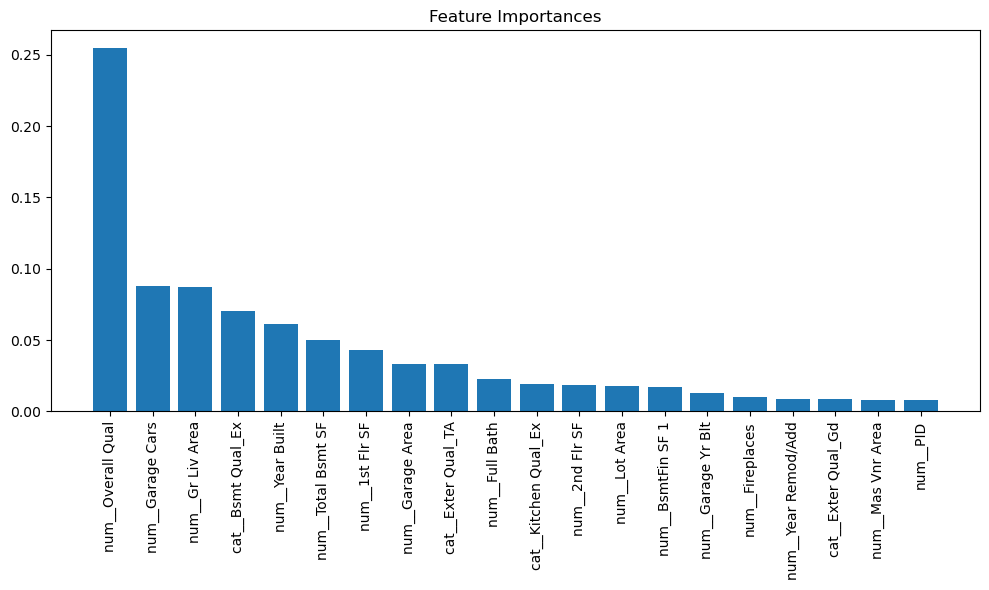

In [157]:
#visuelize important features
#as i understand random forest regression use only 20/76 featur
importances = best_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(20), importances[indices[:20]])
plt.xticks(range(20), feature_names[indices[:20]], rotation=90)
plt.tight_layout()
plt.show()

In [159]:
# Save the model
joblib.dump(best_model, "random_forest_final_model.pkl")

# Save the preprocessing pipeline (critical for new data!)
joblib.dump(preprocessor, "preprocessing_pipeline.pkl")

['preprocessing_pipeline.pkl']

In [160]:
print("Versions:")
print("sklearn:", sklearn.__version__)
print("joblib:", joblib.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)


Versions:
sklearn: 1.3.2
joblib: 1.4.2
numpy: 1.24.3
pandas: 2.0.3
